Creating Matches
----------------

One of the capabilities of the library is to create a match between two players. Players are implemented in
the library as `classes`. A list of all the implemented strategies in the library can be found here: http://axelrod.readthedocs.io/en/latest/reference/all_strategies.html

For now we are going to use two simple strategies to demonstrate how we create a `match`.
A match is often useful when designing new strategies in order to study how they perform against specific opponents.

So for example lets create a 5 turns match between `Cooperator()` and `Random()`. 

In [1]:
import axelrod as axl

In [2]:
axl.__version__

'3.0.0'

In [3]:
players = (axl.Cooperator(), axl.Random())
match = axl.Match(players, turns=5)
results = match.play()
results

[('C', 'D'), ('C', 'D'), ('C', 'C'), ('C', 'C'), ('C', 'C')]

We can also obtain the score of the match.

In [4]:
scores = match.scores()
scores

[(0, 5), (0, 5), (3, 3), (3, 3), (3, 3)]

and various other measures.

In [5]:
match.final_score()

(9, 19)

In [6]:
match.final_score_per_turn()

(1.8, 3.8)

In [7]:
match.winner()

Random: 0.5

In [8]:
match.cooperation()  # The count of cooperations

(5, 3)

In [9]:
match.normalised_cooperation() 

(1.0, 0.6)

EXERCISE
--------
Use the `Match` class to create the following matches:
    
- 5 turns match Cooperator vs Defector 
- 10 turns match Tit For Tat vs Grumpy

Creating Tournaments
-----------------------

Remember the library was created to study the interactions between strategies in a round robin tournament. A tournament where each strategy play against all opponents and the strategy with the highest score is the winner of the tournament. Here we will cover how we can easily create a very simple IPD tournament.

Here we create a list of players. 


**Note:** A list and the documentation of all the implemended strategies can be found [here](http://axelrod.readthedocs.io/en/latest/reference/all_strategies.html).

In [10]:
players = [axl.Cooperator(), axl.Defector(), axl.Random(),
           axl.TitForTat(), axl.Grumpy(), axl.Alternator()]

We can now create a tournament, play it, save the results and view the rank of each player:

In [11]:
tournament = axl.Tournament(players=players)
tournament.turns # default value of turns

200

In [12]:
tournament.repetitions # default value of repititions

10

In [13]:
results = tournament.play()
winners = results.ranked_names
winners

Finishing: 100%|██████████| 25/25 [00:00<00:00, 4037.02it/s]


['Alternator',
 'Defector',
 'Random: 0.5',
 'Tit For Tat',
 'Grumpy: Nice, 10, -10',
 'Cooperator']

In [14]:
scores = results.scores
scores

[[1776, 1788, 1803, 1788, 1818, 1782, 1830, 1740, 1818, 1797],
 [2648, 2664, 2672, 2700, 2628, 2592, 2652, 2668, 2636, 2628],
 [2588, 1990, 2135, 2597, 2241, 2634, 2571, 2213, 2558, 2605],
 [2368, 2334, 2345, 2348, 2371, 2349, 2348, 2352, 2339, 2349],
 [1995, 2250, 2159, 1977, 2167, 1998, 1977, 2175, 1989, 2007],
 [2653, 2656, 2663, 2666, 2659, 2610, 2696, 2645, 2613, 2656]]

We can also plot the results.

In [15]:
%matplotlib inline

/home/nightwing/anaconda3/envs/spacy/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


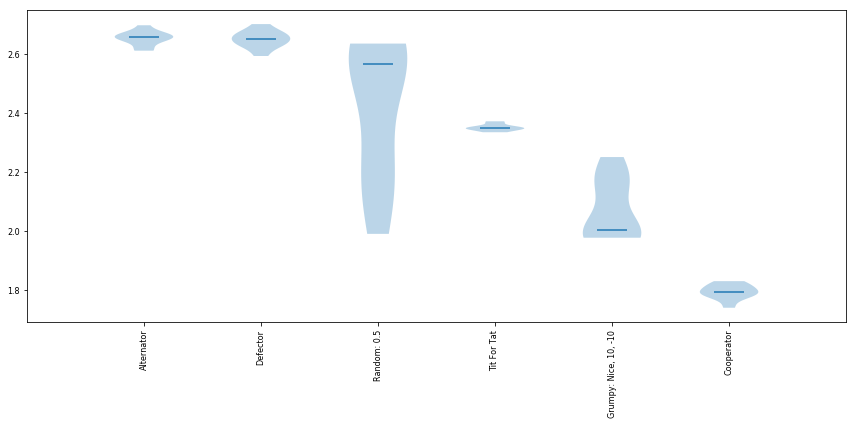

In [16]:
plot = axl.Plot(results)
p = plot.boxplot()
p.show()

EXERCISE
--------

Create your own tournament using any five players from the library.

Futhermore, look at the ranked names and plot the scores.

Summary
--------

This section has discussed:

- Creating a match
- and creating various tournaments.

In the next section we will send some time looking at what is called the human strategy.